In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
import pandas as pd
from time import sleep
from collections import defaultdict

warnings.filterwarnings(action='ignore')

from tqdm import tqdm
from crawler.utils.daily_reports import DailyReports

%matplotlib inline

In [3]:
elastic_info = {
    'host': 'https://crawler-es.cloud.ncsoft.com:9200', 
    'auth': 'ZWxhc3RpYzpzZWFyY2hUMjAyMA=='
}

reports = DailyReports(**elastic_info, encoded_auth=True)

reports.set_plt_font()

<Figure size 1440x1440 with 0 Axes>

# 인덱스 수량

In [4]:
date_range = '2021-01-01~2021-03-31'
date_range = '2020-09-01~2020-12-31'

neddle = set(['naver', '2020'])

In [5]:
index_size = [x for x in reports.state['size'] if set(x['index'].split('-')).intersection(neddle) == neddle]

In [6]:
df_size = pd.DataFrame(index_size).set_index('index')

df_size['count'] = df_size['count'].astype(float)

reports.custom_display(df_size.describe())

,count
count,9
mean,283163
std,270919
min,24509
25%,100757
50%,149807
75%,342395
max,877765


<AxesSubplot:>

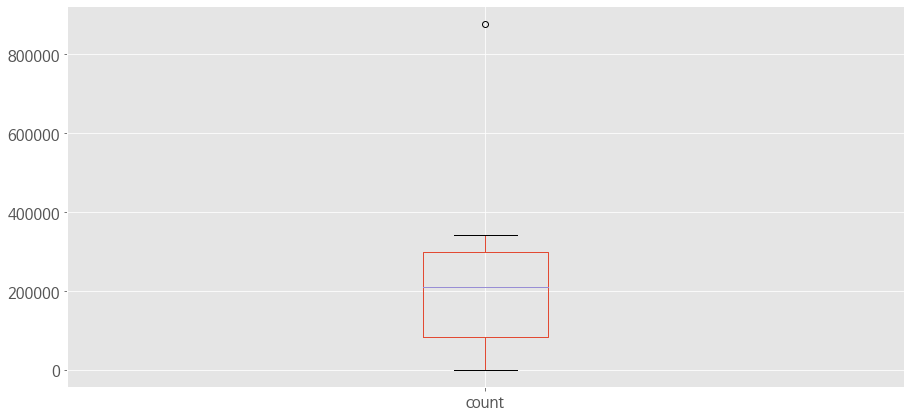

In [7]:
df_size.describe().boxplot(figsize=(15, 7))

In [8]:
reports.custom_display(df_size)

,count
index,
crawler-naver-economy-2020,522892
crawler-naver-international-2020,100757
crawler-naver-it-2020,99612
crawler-naver-living-2020,138535
crawler-naver-opinion-2020,24509
crawler-naver-politics-2020,342395
crawler-naver-society-2020,877765
crawler-naver-sports-2020,292198
crawler-naver-tv-2020,149807


<AxesSubplot:xlabel='index'>

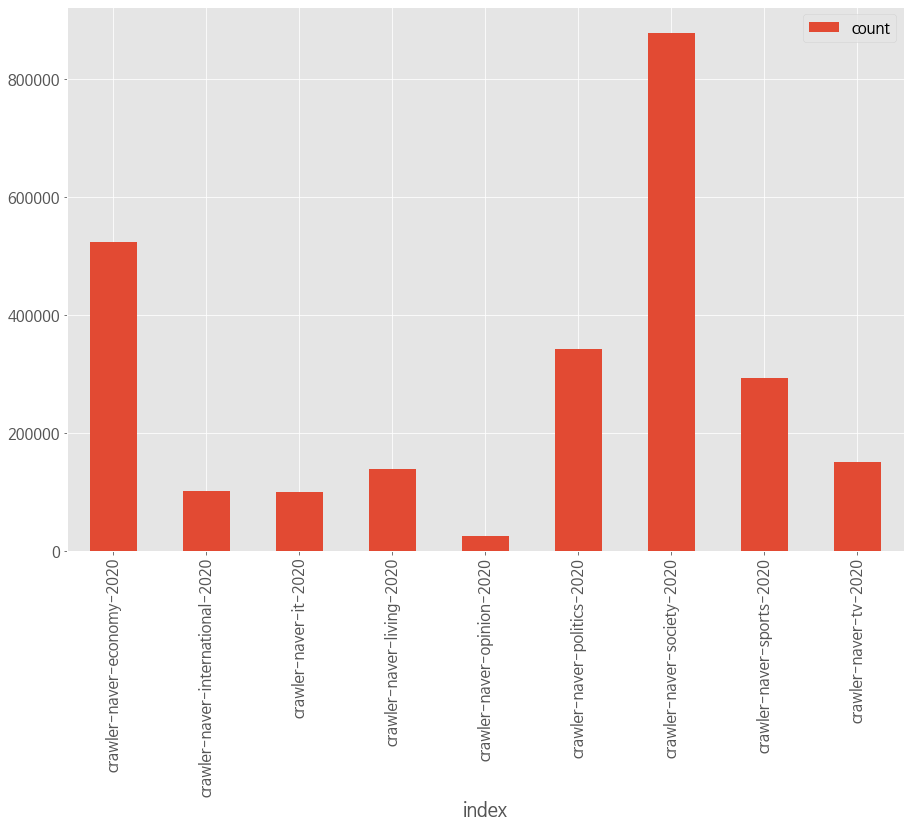

In [9]:
df_size.plot(kind='bar', figsize=(15, 10))

# 날짜별 기사 

In [10]:
index_list = [x for x in reports.state['list'] if set(x.split('-')).intersection(neddle) == neddle]

data = reports.get_index_histogram(index_list=','.join(index_list), date_range=date_range)
    
df_date = pd.DataFrame(data).fillna(0)

In [11]:
reports.custom_display(df_date)

,society,economy,politics,sports,tv,living,international,it,opinion
2020-09-01,9006,5106,3643,0,1253,1384,628,1184,117
2020-09-02,10245,5654,3417,0,1618,1875,846,1119,272
2020-09-03,10902,5705,2987,0,1766,1975,878,1065,264
2020-09-04,7744,4114,2353,0,1381,1303,785,824,199
2020-09-05,2088,691,608,0,726,457,420,104,94
2020-09-06,3903,1819,1442,0,714,607,395,389,99
2020-09-07,9962,5121,3041,0,1662,1853,727,973,280
2020-09-08,8866,5805,2963,0,1420,1294,886,1071,292
2020-09-09,9079,5860,3226,960,1447,1274,925,1152,270
2020-09-10,8988,6189,3474,1830,1438,1324,994,1320,261


In [12]:
reports.custom_display(df_date.describe())

,society,economy,politics,sports,tv,living,international,it,opinion
count,122,122,122,122,122,122,122,122,122
mean,7120,4252,2783,2380,1217,1125,819,811,199
std,3023,2223,1359,1303,375,457,275,429,81
min,1390,555,371,0,340,307,312,77,12
25%,3807,1816,1334,1547,712,580,510,389,99
50%,8648,5324,3144,2371,1426,1318,903,976,244
75%,9360,5951,3685,3117,1488,1446,984,1143,266
max,11961,7514,5617,6423,1766,1975,2009,1495,296


<AxesSubplot:>

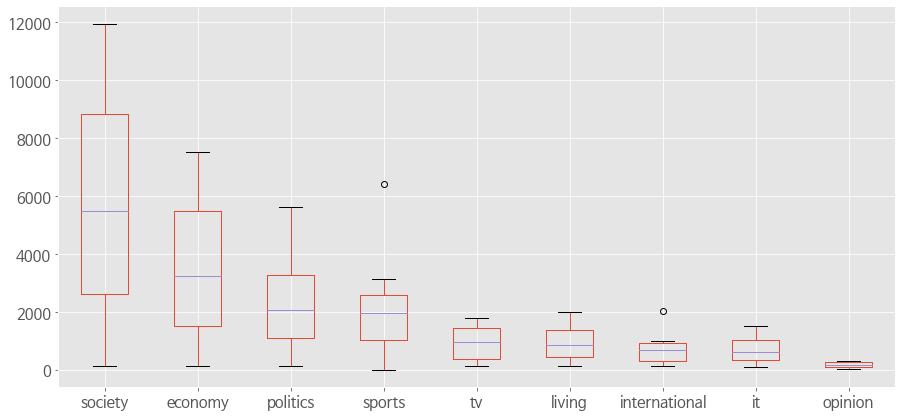

In [13]:
order = df_date.describe().median().sort_values(ascending=False)
df_date.describe()[order.index].boxplot(figsize=(15, 7))

<AxesSubplot:>

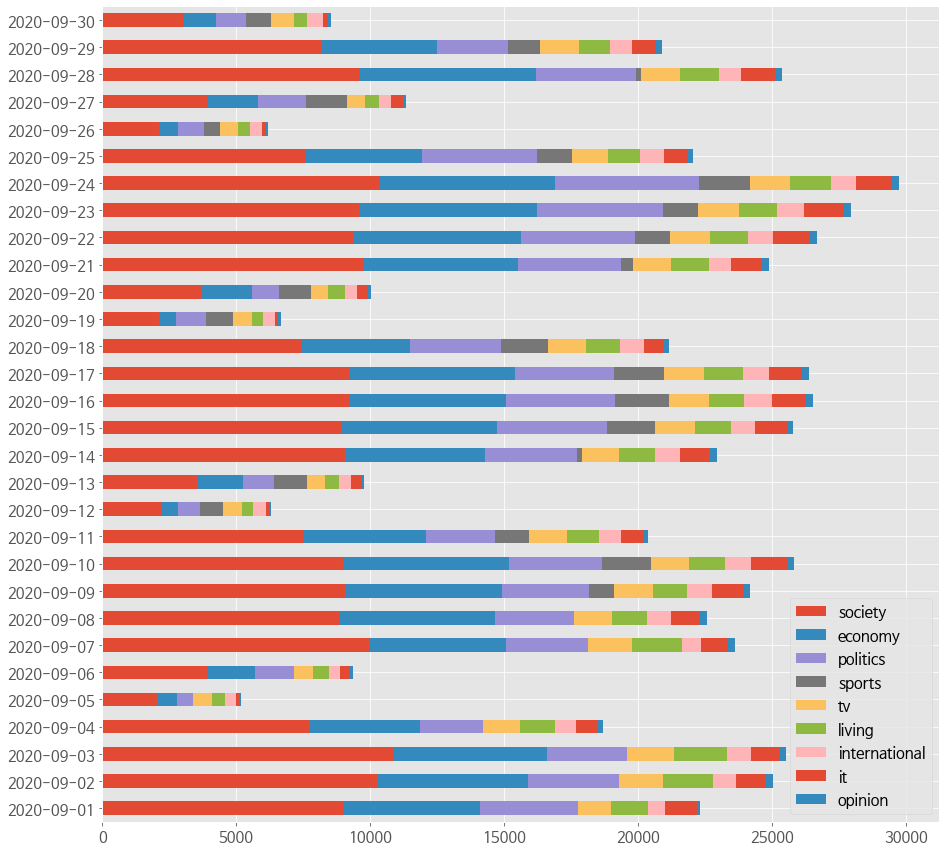

In [14]:
month_st, month_en = 9, 10

mask = (f'2020-{month_st:02}-01' <= df_date.index) & (df_date.index < f'2020-{month_en:02}-01')
display(df_date[ mask ].plot(kind='barh', stacked=True, figsize=(15, 15)))

# 백필 현재 위치 

In [53]:
index_list = [x for x in reports.state['list'] if set(x.split('-')).intersection(neddle) == neddle]

data = reports.get_category_min_date(index_list=','.join(index_list))

In [58]:
df_backfill_pos = pd.DataFrame(data).set_index(['section', 'category'])

In [59]:
df_backfill_pos

date
section       category              
society       사회/사회일반     2020-08-31
              사회/지역       2020-08-31
              사회/사건사고     2020-08-31
              사회/식품의료     2020-08-31
              사회/인물       2020-08-31
              사회/교육       2020-08-31
economy       경제/경제 일반    2020-08-31
              경제/산업/재계    2020-08-31
              경제/증권       2020-08-31
              경제/금융       2020-08-31
              경제/부동산      2020-08-31
              경제/생활경제     2020-08-31
              경제/중기/벤처    2020-08-31
              경제/글로벌 경제   2020-08-31
politics      정치/정치일반     2020-08-31
              정치/국회정당     2020-08-31
              정치/국방외교     2020-08-31
              정치/청와대      2020-08-31
              정치/행정       2020-08-31
              정치/북한       2020-08-31
sports        스포츠/야구      2020-08-31
              스포츠/농구      2020-09-30
              스포츠/해외축구    2020-09-30
              스포츠/축구      2020-09-30
              스포츠/배구      2020-09-30
              스포츠/골프      2020-09-30
              스포츠/해외야구    2020-09-08
              스포츠/게임      2020-09-30
              스포츠/스포츠-일반  2020-09-30
tv            TV          2020-08-31
living        생활/일반       2020-08-31
              생활/날씨       2020-08-31
              생활/건강정보     2020-08-31
              생활/자동차시승기   2020-08-31
              생활/여행/레저    2020-08-31
              생활/공연전시     2020-08-31
              생활/책        2020-08-31
              생활/종교       2020-08-31
              생활/패션뷰티     2020-08-31
international 세계/일반       2020-08-31
              세계/미국중남미    2020-08-31
              세계/아시아호주    2020-08-31
              세계/유럽       2020-08-31
              세계/중동아프리카   2020-08-31
it            IT/IT 일반    2020-08-31
              IT/과학 일반    2020-08-31
              IT/게임/리뷰    2020-08-31
              IT/통신/뉴미디어  2020-08-31
              IT/인터넷/SNS  2020-08-31
              IT/모바일      2020-08-31
              IT/컴퓨터      2020-08-31
              IT/보안/해킹    2020-08-27
opinion       오피니언        2020-08-31